In [1]:
# It is also called multinomial logistic regression
'''
Sigmoid function does not work on more than two clases it can only say yes / no.

For more reffer the proof of the softmax from the file

'''

'\nSigmoid function does not work on more than two clases it can only say yes / no.\n\nFor more reffer the proof of the softmax from the file\n\n'

In [12]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df = df[['sepal_length', 'petal_length', 'species']]

In [10]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [11]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
clf = LogisticRegression(multi_class='multinomial') #multinomial means for the softmax more than one class


In [15]:
clf.fit(X_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [16]:
y_pred = clf.predict(X_test)

In [17]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [18]:
cm = confusion_matrix(y_test,y_pred)

<Axes: >

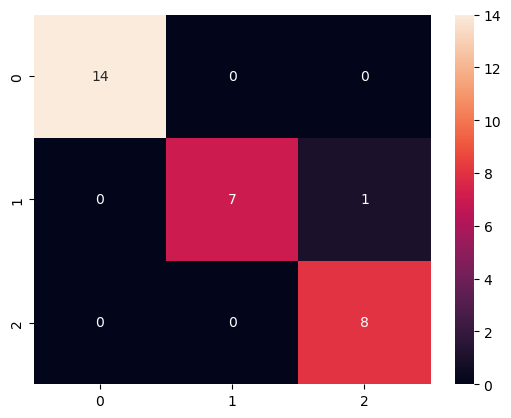

In [ ]:
sns.heatmap(cm,
            annot=True,
            fmt='g',)


In [25]:
#example prediction
query = np.array([[3.4,2.7]])
# no fetching the z values from each softmax function 

clf.predict_proba(query)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25865651e-01, 2.73720718e-01, 4.13631316e-04]])

In [27]:
clf.predict(query)#returing the 0 from above array as its softmax output is bigger than others

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

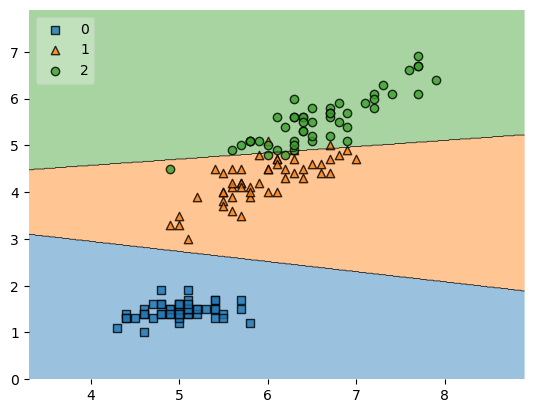

In [30]:

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values,y.values,clf,legend=2)

